In [1]:

import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
 

# In the next code, we want to obtain the objects that are contained in the load_digits library from sklearn datasets.

In [2]:
digits=load_digits 
dir(digits)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__',
 '_skl_parameter_constraints']

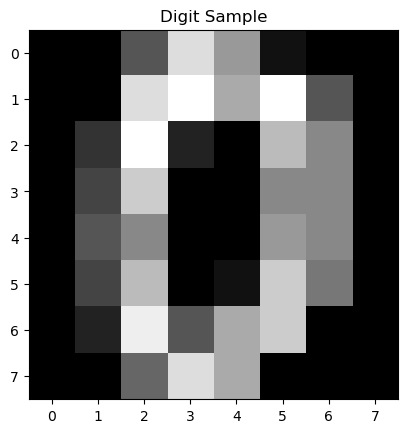

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
plt.imshow(digits.images[0], cmap='gray')
plt.title('Digit Sample')
plt.show()


# We plot the sample digit and below we print them in a range of 5.

<Figure size 640x480 with 0 Axes>

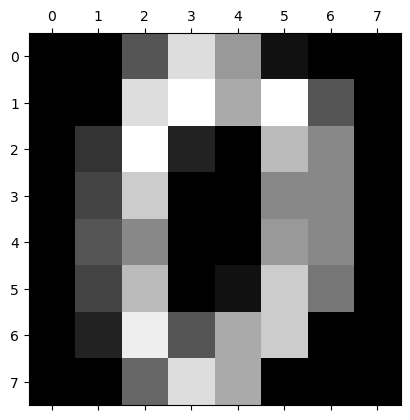

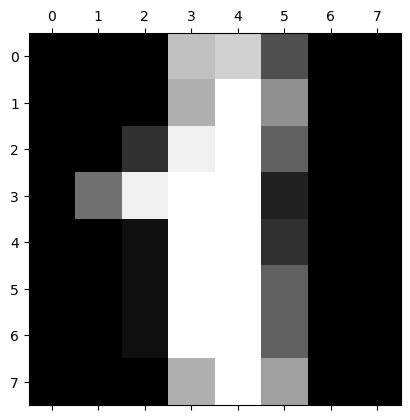

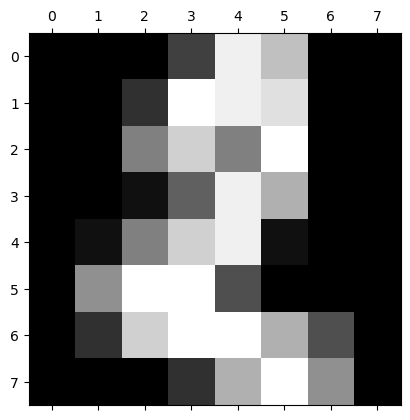

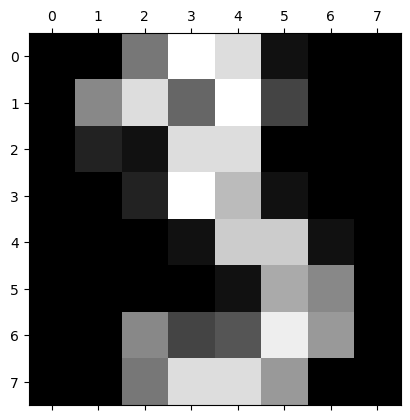

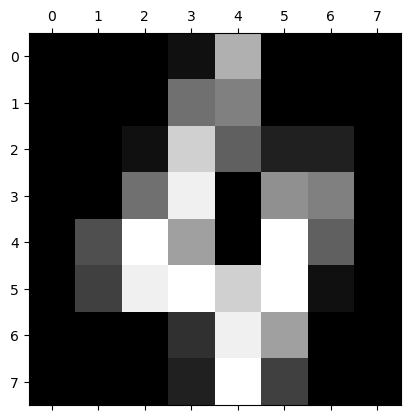

In [4]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

# We split the dataset in training df (80%) and test df (20%).

In [5]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.2)

In [6]:
len(x_train)

1437

In [7]:
len(x_test)

360

# We use Logistic Regression (Multiclass clssifacation) to train the model and obtain the score which was (96%)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [11]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

c:\Users\rillh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9694444444444444

# Making a prediction using the model.

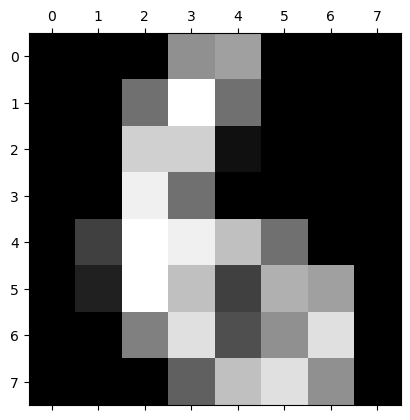

In [13]:
plt.matshow(digits.images[65])

In [14]:
digits.target[65]

6

In [15]:
model.predict([digits.data[65]])

array([6])

# Introducing Confusion matrix to obtain a score and vizualize it.

In [16]:
y_predicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test, y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

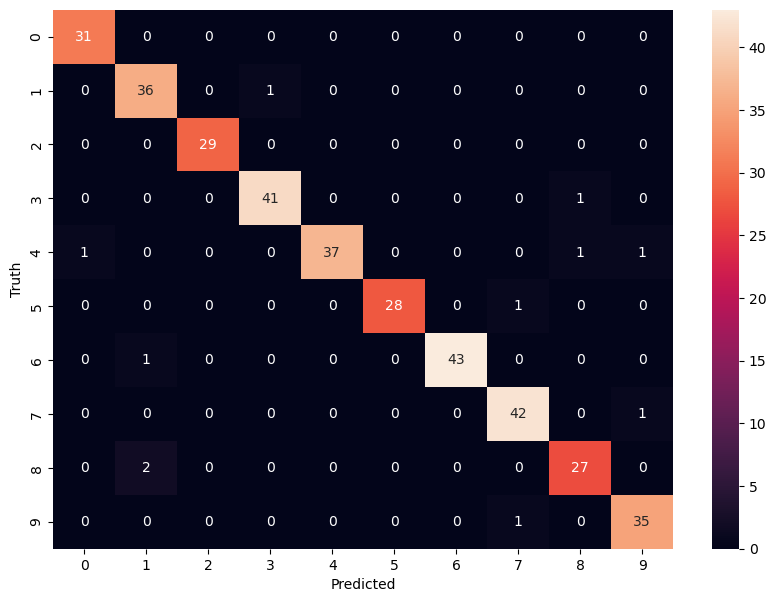

In [17]:
import seaborn as sn  
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

This is a confusion matrix heatmap that visualizes the performance of a classification model over 10 classes (labeled 0 to 9). Here's a breakdown of the analysis:

---

### **1. General Structure**
- **X-axis (Predicted):** The classes predicted by this model.
- **Y-axis (Truth):** The actual ground-truth labels.
- **Diagonal values:** Correct predictions. The stronger (brighter) the color on the diagonal, the better the performance.

---

### **2. Performance Summary by Class**

| Class | True Positives | Misclassifications | Notes |
|-------|----------------|--------------------|-------|
| 0     | 31             | 0                  | Excellent performance |
| 1     | 36             | 1 (predicted as 3) | Slight confusion with class 3 |
| 2     | 29             | 0                  | Perfect |
| 3     | 41             | 1 (as 8)           | Strong performance |
| 4     | 37             | 3 (as 0, 8, 9)     | Minor confusion with nearby classes |
| 5     | 28             | 2 (as 7, 8)        | Slight confusion |
| 6     | 43             | 1 (as 1)           | Strong performance overall |
| 7     | 42             | 1 (as 9)           | Excellent |
| 8     | 27             | 2 (as 1)           | Noticeable confusion with class 1 |
| 9     | 35             | 1 (as 6)           | Very good performance |

---

### **3. Key Observations**
- **Strong diagonal dominance:** Most predictions are correct, which means the model is well-trained.
- **Most errors are off-diagonal but sparse:** Misclassifications are rare and often only by one instance.
- **Class 4 and 8 show slightly more dispersion:** They are misclassified as multiple other classes, though still minor.

---

### **4. Suggestions for Improvement**
- I will Consider reviewing the **feature distribution** or representations for class 4 and class 8, as they show slightly more confusion.
- I might benefit from:
  - Data augmentation because I am using images.
  - Better feature engineering,
  - Or using ensemble techniques to improve prediction reliability on difficult classes.

---

